In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the databases from resources
health_factors = pd.read_csv("/content/Health_Risk_factors.csv")
agriculture = pd.read_csv("/content/emissions.csv")


In [3]:
merged_df = pd.concat([agriculture, health_factors['Incidence of tuberculosis  per 100,000 people 2018']], axis=1)

In [4]:
merged_df.columns

Index(['Country', 'Net energy imports  % of energy use 1990',
       'Net energy imports  % of energy use 2015',
       'GDP per unit of energy use  2011 PPP $ per kilogram of oil equivalent 1990',
       'GDP per unit of energy use  2011 PPP $ per kilogram of oil equivalent 2015',
       'Carbon dioxide emissions Total thousand metric tons 1990',
       'Carbon dioxide emissions Total thousand metric tons 2014',
       'Carbon dioxide emissions Carbon intensity kilograms per kilograms of oil equivalent energy use 1990',
       'Carbon dioxide emissions Carbon intensity kilograms per kilograms of oil equivalent energy use 2014',
       'Carbon dioxide emissions per capita metric tons 1990',
       'Carbon dioxide emissions per capita metric tons 2014',
       'Carbon dioxide emissions  kilograms per 2011 PPP $ of GDP 1990',
       'Carbon dioxide emissions  kilograms per 2011 PPP $ of GDP 2014',
       'Incidence of tuberculosis  per 100,000 people 2018'],
      dtype='object')

In [7]:
# Renaming columns in the health_factors DataFrame to more descriptive names
ag = merged_df.rename(columns={
    "Incidence of tuberculosis  per 100,000 people 2018": "tuberculosis",
    'Net energy imports  % of energy use 2015': "energy_imported",
    'Carbon dioxide emissions Carbon intensity kilograms per kilograms of oil equivalent energy use 2014': "CO2_emission_per_oil",
    'Carbon dioxide emissions per capita metric tons 2014': "CO2_emission_per_capita",
    "Carbon dioxide emissions  kilograms per 2011 PPP $ of GDP 2014": "CO2_emission_per_GDP"})
ag.columns
ag.describe()

,Net energy imports % of energy use 1990,energy_imported,GDP per unit of energy use 2011 PPP $ per kilogram of oil equivalent 1990,GDP per unit of energy use 2011 PPP $ per kilogram of oil equivalent 2015,Carbon dioxide emissions Total thousand metric tons 1990,Carbon dioxide emissions Total thousand metric tons 2014,Carbon dioxide emissions Carbon intensity kilograms per kilograms of oil equivalent energy use 1990,CO2_emission_per_oil,Carbon dioxide emissions per capita metric tons 1990,CO2_emission_per_capita,Carbon dioxide emissions kilograms per 2011 PPP $ of GDP 1990,CO2_emission_per_GDP,tuberculosis
count,133.000000,140.000000,145.000000,137.000000,55.000000,41.000000,158.000000,140.000000,193.000000,202.000000,168.000000,191.000000,207.000000
mean,-29.218045,-16.471429,9.469655,9.649635,339.654545,405.780488,2.332911,2.135000,4.579275,4.905941,0.325000,0.251309,102.893720
std,167.718891,127.742515,7.147798,4.539648,286.374090,256.712632,1.001810,0.802687,5.914000,6.507765,0.311986,0.186338,137.634271
min,-808.000000,-581.000000,1.000000,2.000000,7.000000,11.000000,0.100000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-16.000000,-29.250000,4.800000,6.500000,101.000000,198.000000,1.800000,1.675000,0.500000,0.825000,0.100000,0.100000,9.500000
50%,20.000000,24.500000,8.600000,9.300000,213.000000,440.000000,2.400000,2.300000,2.100000,2.600000,0.200000,0.200000,45.000000
75%,57.000000,53.000000,12.000000,12.100000,548.500000,576.000000,3.000000,2.700000,7.300000,6.200000,0.400000,0.300000,144.000000
max,100.000000,100.000000,59.500000,27.400000,994.000000,935.000000,5.600000,3.900000,28.400000,43.900000,1.600000,1.400000,611.000000


<ipython-input-8-6c57687788e0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=merged_df.corr()


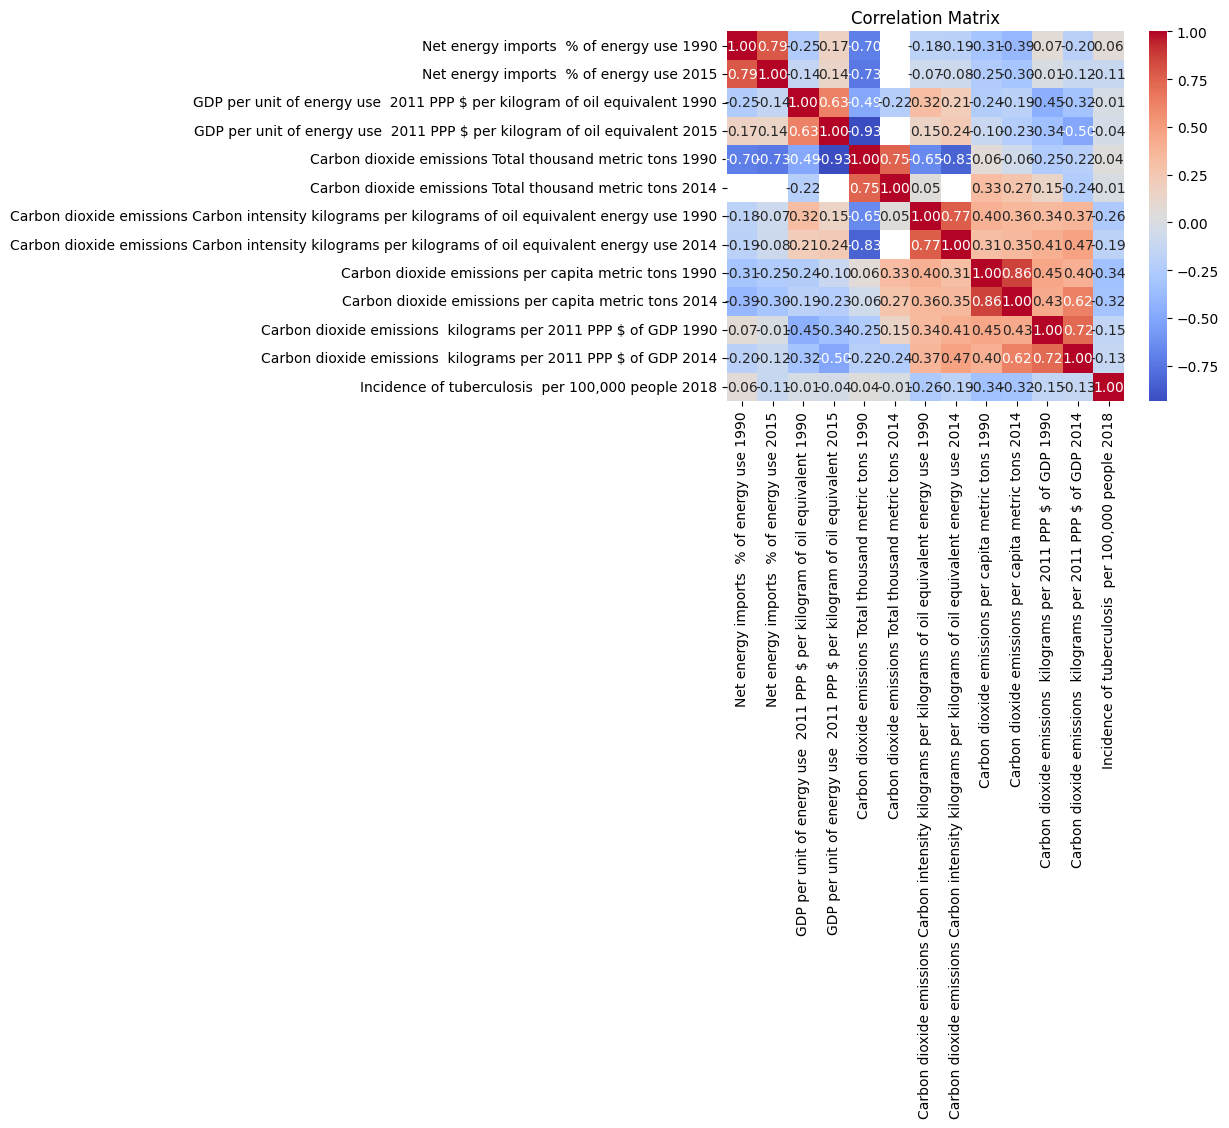

In [8]:
correlation_matrix=merged_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [9]:
df=ag[["energy_imported","CO2_emission_per_oil","CO2_emission_per_capita", "CO2_emission_per_GDP" , 'tuberculosis']]
#df1 = ag.replace('', np.nan)  # Replace empty values with NaN
df1 = df.dropna()  # Drop rows with any missing values

In [10]:
df1["tuberculosis"].describe()

count    135.000000
mean      91.755556
std      128.953681
min        0.000000
25%       10.000000
50%       38.000000
75%      108.000000
max      554.000000
Name: tuberculosis, dtype: float64

In [12]:
# Define the thresholds for classification

threshold_tuberculosis = 100
# Create a DataFrame to store the classified values
df2 = pd.DataFrame()
# Classify every columns
df2=df1[["energy_imported","CO2_emission_per_oil","CO2_emission_per_capita", "CO2_emission_per_GDP" ]]
df2['tuberculosis'] = [0 if i < threshold_tuberculosis else 1 for i in df1['tuberculosis']]

# Extract X and y
y = df2['tuberculosis'].values
X = df2.drop(columns='tuberculosis').values
df2.shape

(135, 5)

In [13]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1,stratify=y,test_size=.2)

In [14]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
l_1 = 50
l_2 = 50
input_features = len(X_train[0])
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=l_1, input_dim = input_features, activation = "tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=l_2, activation = "LeakyReLU"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                250       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
# Train the model
nn.fit(X_train, y_train, epochs=50)

Epoch 1/50
4/4 [==============================] - 1s 8ms/step - loss: 0.6997 - accuracy: 0.5741
Epoch 2/50
4/4 [==============================] - 0s 5ms/step - loss: 0.6188 - accuracy: 0.6296
Epoch 3/50
4/4 [==============================] - 0s 5ms/step - loss: 0.5750 - accuracy: 0.7315
Epoch 4/50
4/4 [==============================] - 0s 6ms/step - loss: 0.5508 - accuracy: 0.7407
Epoch 5/50
4/4 [==============================] - 0s 6ms/step - loss: 0.5377 - accuracy: 0.7407
Epoch 6/50
4/4 [==============================] - 0s 4ms/step - loss: 0.5313 - accuracy: 0.7407
Epoch 7/50
4/4 [==============================] - 0s 4ms/step - loss: 0.5236 - accuracy: 0.7407
Epoch 8/50
4/4 [==============================] - 0s 5ms/step - loss: 0.5139 - accuracy: 0.7407
Epoch 9/50
4/4 [==============================] - 0s 4ms/step - loss: 0.5098 - accuracy: 0.7407
Epoch 10/50
4/4 [==============================] - 0s 7ms/step - loss: 0.4936 - accuracy: 0.7407
Epoch 11/50
4/4 [======================

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: 0.4072 - accuracy: 0.8148 - 189ms/epoch - 189ms/step
Loss: 0.40718913078308105, Accuracy: 0.8148148059844971


In [18]:
# Predict on the test data
y_pred = nn.predict(X_test)

# The predictions will be in the form of probabilities, so you might want to round them to get class labels (0 or 1)
y_pred_class = y_pred.round()
# Calculate the accuracy of the predictions
correct_predictions = (y_pred_class == y_test.reshape(-1, 1)).sum()
total_samples = len(y_test)
accuracy = correct_predictions / total_samples
print("Accuracy:", accuracy)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_class))

1/1 [==============================] - 0s 102ms/step
Accuracy: 0.8148148148148148
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.88        20
           1       0.75      0.43      0.55         7

    accuracy                           0.81        27
   macro avg       0.79      0.69      0.71        27
weighted avg       0.81      0.81      0.80        27

